In [28]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix

In [7]:
df = pd.read_csv("Delinquency_prediction.csv")
print(df.head())

  Customer_ID  Age    Income  Credit_Score  Credit_Utilization  \
0    CUST0001   56  165580.0         398.0            0.390502   
1    CUST0002   69  100999.0         493.0            0.312444   
2    CUST0003   46  188416.0         500.0            0.359930   
3    CUST0004   32  101672.0         413.0            0.371400   
4    CUST0005   60   38524.0         487.0            0.234716   

   Missed_Payments  Delinquent_Account  Loan_Balance  Debt_to_Income_Ratio  \
0                3                   0       16310.0              0.317396   
1                6                   1       17401.0              0.196093   
2                0                   0       13761.0              0.301655   
3                3                   0       88778.0              0.264794   
4                2                   0       13316.0              0.510583   

  Employment_Status  Account_Tenure Credit_Card_Type     Location  
0               EMP              18          Student  Los Angeles 

In [8]:
df.shape

(500, 13)

In [9]:
df.columns

Index(['Customer_ID', 'Age', 'Income', 'Credit_Score', 'Credit_Utilization',
       'Missed_Payments', 'Delinquent_Account', 'Loan_Balance',
       'Debt_to_Income_Ratio', 'Employment_Status', 'Account_Tenure',
       'Credit_Card_Type', 'Location'],
      dtype='object')

In [10]:
df.dtypes

Customer_ID              object
Age                       int64
Income                  float64
Credit_Score            float64
Credit_Utilization      float64
Missed_Payments           int64
Delinquent_Account        int64
Loan_Balance            float64
Debt_to_Income_Ratio    float64
Employment_Status        object
Account_Tenure            int64
Credit_Card_Type         object
Location                 object
dtype: object

In [11]:
df.isnull().sum()

Customer_ID              0
Age                      0
Income                  39
Credit_Score             2
Credit_Utilization       0
Missed_Payments          0
Delinquent_Account       0
Loan_Balance            29
Debt_to_Income_Ratio     0
Employment_Status        0
Account_Tenure           0
Credit_Card_Type         0
Location                 0
dtype: int64

In [12]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [13]:
df.head()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix


In [14]:
df['Employment_Status'].unique()

array(['EMP', 'Self-employed', 'Unemployed', 'employed', 'Employed',
       'retired'], dtype=object)

In [15]:
df['Employment_Status'] = df['Employment_Status'].replace('EMP', 'Employed')


In [16]:
df['Employment_Status'] = df['Employment_Status'].replace('employed', 'Employed')

In [17]:
df['Employment_Status'] = df['Employment_Status'].map({
    'Unemployed': 0,
    'Employed': 1,
    'Self-employed': 2,
    'retired': 3
})


In [18]:
df['Credit_Card_Type'].unique()

array(['Student', 'Standard', 'Platinum', 'Gold', 'Business'],
      dtype=object)

In [19]:
df['Credit_Card_Type']=df['Credit_Card_Type'].map({
    'Student' : 0,
    'Standard' : 1, 
    'Platinum' : 2,
    'Gold' : 3, 
    'Business' : 4
})

In [20]:
df.dtypes

Customer_ID              object
Age                       int64
Income                  float64
Credit_Score            float64
Credit_Utilization      float64
Missed_Payments           int64
Delinquent_Account        int64
Loan_Balance            float64
Debt_to_Income_Ratio    float64
Employment_Status         int64
Account_Tenure            int64
Credit_Card_Type          int64
Location                 object
dtype: object

In [21]:
x= df.drop(['Customer_ID', 'Location', 'Delinquent_Account'], axis=1)
y= df['Delinquent_Account']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [23]:
model = SVC(kernel='linear', random_state=42)
model.fit(x_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [24]:
y_pred = model.predict(x_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n SVM Model Performance Metrics ")
print(f"Accuracy  : {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall    : {recall:.3f}")
print(f"F1-Score  : {f1:.3f}")
print("\nDetailed Report:\n", classification_report(y_test, y_pred))


 SVM Model Performance Metrics 
Accuracy  : 0.847
Precision : 0.870
Recall    : 0.847
F1-Score  : 0.783

Detailed Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       126
           1       1.00      0.04      0.08        24

    accuracy                           0.85       150
   macro avg       0.92      0.52      0.50       150
weighted avg       0.87      0.85      0.78       150



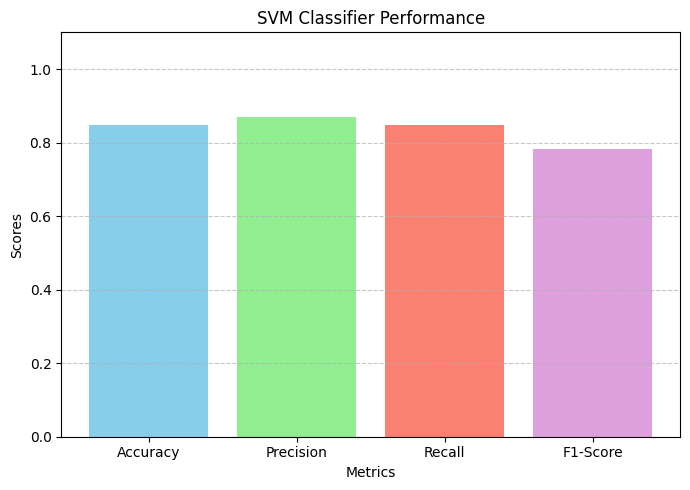

In [26]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(7,5))
plt.bar(metrics, scores, color=['skyblue', 'lightgreen', 'salmon', 'plum'])
plt.ylim(0, 1.1)
plt.title("SVM Classifier Performance")
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [29]:
print(confusion_matrix(y_test, y_pred))

[[126   0]
 [ 23   1]]


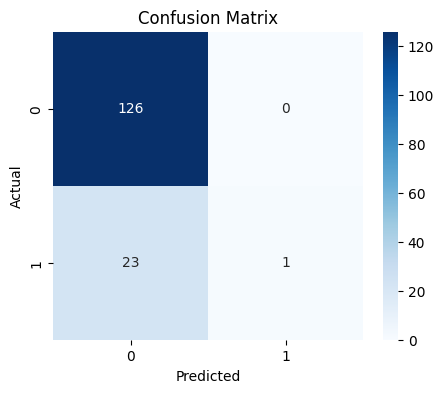

In [30]:
lo_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(lo_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()